In [1]:
import pandas as pd

# Combined sales and sentiment data
data = {
    "Year": [2019, 2020, 2021, 2022, 2023, 2024],
    "Supportive (%)": [19.64, 12.64, 16.22, 10.86, 9.87, 14.55],
    "Critical of Brand (%)": [67.93, 56.32, 70.27, 77.96, 76.53, 65.45],
    "Critical of Message (%)": [0.80, 2.30, 0.00, 0.00, 0.53, 1.21],
    "Irrelevant (%)": [11.62, 28.73, 13.51, 11.18, 13.07, 18.79],
    "Net Sales Change (%)": [-5, -2, 6, 2, -3, 4],
    "Volume Change (%)": [-1, -1, 3, 0, -3, 1],
}

df = pd.DataFrame(data)

# Define rules for pseudo-labeling
def assign_label(row):
    if row["Critical of Brand (%)"] > 50 and row["Net Sales Change (%)"] <= 0:
        return "Pull"
    elif row["Supportive (%)"] > 15 and row["Net Sales Change (%)"] > 0:
        return "Push"
    else:
        return "Neutral"

# Apply pseudo-labels
df["Campaign Decision"] = df.apply(assign_label, axis=1)

print(df)


   Year  Supportive (%)  Critical of Brand (%)  Critical of Message (%)  \
0  2019           19.64                  67.93                     0.80   
1  2020           12.64                  56.32                     2.30   
2  2021           16.22                  70.27                     0.00   
3  2022           10.86                  77.96                     0.00   
4  2023            9.87                  76.53                     0.53   
5  2024           14.55                  65.45                     1.21   

   Irrelevant (%)  Net Sales Change (%)  Volume Change (%) Campaign Decision  
0           11.62                    -5                 -1              Pull  
1           28.73                    -2                 -1              Pull  
2           13.51                     6                  3              Push  
3           11.18                     2                  0           Neutral  
4           13.07                    -3                 -3              Pull  


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature matrix and target variable
X = df.drop(columns=["Year", "Campaign Decision"])
y = df["Campaign Decision"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Ensure classification_report includes all labels
all_labels = np.unique(y_encoded)  # Ensures all possible classes are considered
print(
    classification_report(
        y_test, y_pred, labels=all_labels, target_names=label_encoder.classes_
    )
)


              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       0.0
        Pull       0.00      0.00      0.00       2.0
        Push       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\Anagha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anagha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anagha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

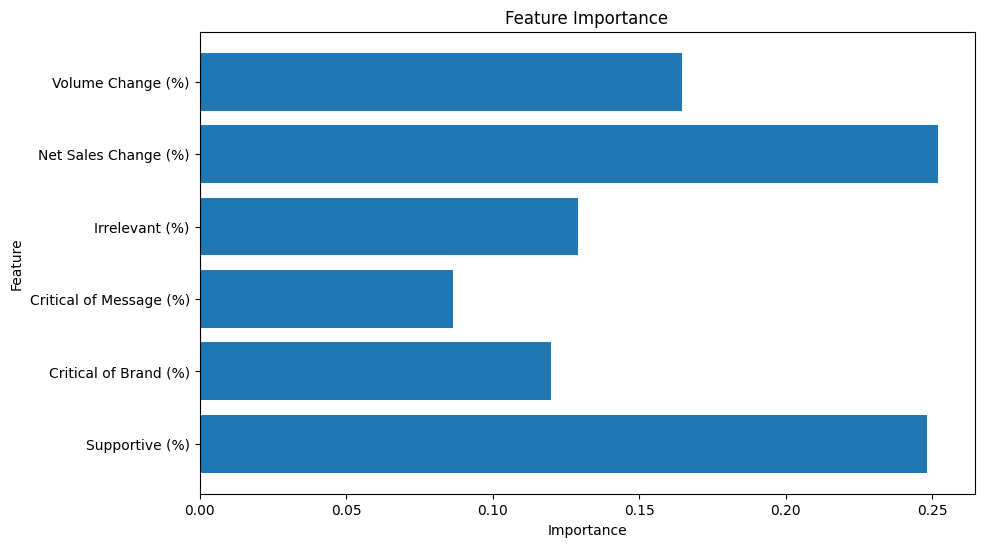

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importances
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
